# Single Variable EDA

In [1]:
import sqlite3
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

con = sqlite3.connect('datawarehouse.db')
mycursor = con.cursor()

In [2]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

## Variables

<table>
    <tr>
        <td>host_days</td>
        <td>Subtract the date the host/user was created from today's date. For hosts that are Airbnb guests this could be the date they registered as a guest.</td>
    </tr>
    <tr>
        <td>host_acceptance_rate</td>
        <td>That rate at which a host accepts booking requests.</td>
    </tr>
    <tr>
        <td>host_is_superhost</td>
        <td></td>
    </tr>
    <tr>
        <td>neighbourhood_cleansed</td>
        <td>The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.</td>
    </tr>
    <tr>
        <td>latitude</td>
        <td>Uses the World Geodetic System (WGS84) projection for latitude and longitude.</td>
    </tr>
    <tr>
        <td>longitude</td>
        <td>Uses the World Geodetic System (WGS84) projection for latitude and longitude.</td>
    </tr>
    <tr>
        <td>room_type</td>
        <td>Private room
Shared room
Entire place
</td>
    </tr>
    <tr>
        <td>accommodates</td>
        <td>The maximum capacity of the listing</td>
    </tr>
    <tr>
        <td>bathrooms</td>
        <td>The number of bathrooms in the listing</td>
    </tr>
    <tr>
        <td>bedrooms</td>
        <td>The number of bedrooms</td>
    </tr>
    <tr>
        <td>price</td>
        <td>daily price in local currency</td>
    </tr>
    <tr>
        <td>number_of_reviews</td>
        <td>The number of reviews the listing has</td>
    </tr>
    <tr>
        <td>number_of_reviews_ltm</td>
        <td>The number of reviews the listing has (in the last 12 months)</td>
    </tr>
    <tr>
        <td>review_scores_rating</td>
        <td></td>
    </tr>
    <tr>
        <td>instant_bookable</td>
        <td>[t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.</td>
    </tr>
    <tr>
        <td>calculated_host_listings_count</td>
        <td>The number of listings the host has in the current scrape, in the city/region geography.</td>
    </tr>
    <tr>
        <td>tempday<td>
        <td></td>
    </tr>
</table>
			



In [3]:
conn = sqlite3.connect('datawarehouse.db') 
          
sql_query = pd.read_sql_query ('''
                                SELECT    
                                date() - host_since as days_host,
                                host_acceptance_rate, host_is_superhost, neighbourhood_cleansed, 
                                latitude, longitude, room_type, accommodates, bathrooms, bedrooms, calendar.price, 
                                number_of_reviews, number_of_reviews_ltm, review_scores_rating, 
                                instant_bookable, calculated_host_listings_count, tempday
                                FROM listings join calendar on calendar.listing_id = listings.id join weather on weather.id = calendar.date 
                               ''', conn)

df = pd.DataFrame(sql_query, columns = ['days_host', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 
                                        'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 
                                        'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 
                                        'instant_bookable', 'calculated_host_listings_count', 'tempday'])
df

,days_host,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,instant_bookable,calculated_host_listings_count,tempday
0,15,100%,t,Historic Anacostia,38.86339,-76.98889,Private room,1,,1,$67.00,81,2,4.63,f,1,3.2
1,15,100%,t,Historic Anacostia,38.86339,-76.98889,Private room,1,,1,$67.00,81,2,4.63,f,1,7.2
2,15,100%,t,Historic Anacostia,38.86339,-76.98889,Private room,1,,1,$67.00,81,2,4.63,f,1,13.2
3,15,100%,t,Historic Anacostia,38.86339,-76.98889,Private room,1,,1,$67.00,81,2,4.63,f,1,12.2
4,15,100%,t,Historic Anacostia,38.86339,-76.98889,Private room,1,,1,$67.00,81,2,4.63,f,1,-11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062311,10,97%,f,"Union Station, Stanton Park, Kingman Park",38.89420,-76.97563,Entire home/apt,2,,1,$66.00,38,13,4.09,t,2,6.1
2062312,10,97%,f,"Union Station, Stanton Park, Kingman Park",38.89420,-76.97563,Entire home/apt,2,,1,$66.00,38,13,4.09,t,2,10.0
2062313,10,97%,f,"Union Station, Stanton Park, Kingman Park",38.89420,-76.97563,Entire home/apt,2,,1,$66.00,38,13,4.09,t,2,11.3
2062314,10,97%,f,"Union Station, Stanton Park, Kingman Park",38.89420,-76.97563,Entire home/apt,2,,1,$68.00,38,13,4.09,t,2,17.9


In [4]:
# this changes price from currency to a float
df["price"] = df["price"].replace("[$,]", "", regex=True).astype(float)

In [5]:
# this gets rid of % sign, but there are still N/As in this field so it's not numeric
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("[%]", "", regex=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062316 entries, 0 to 2062315
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   days_host                       int64  
 1   host_acceptance_rate            object 
 2   host_is_superhost               object 
 3   neighbourhood_cleansed          object 
 4   latitude                        float64
 5   longitude                       float64
 6   room_type                       object 
 7   accommodates                    int64  
 8   bathrooms                       object 
 9   bedrooms                        object 
 10  price                           float64
 11  number_of_reviews               int64  
 12  number_of_reviews_ltm           int64  
 13  review_scores_rating            object 
 14  instant_bookable                object 
 15  calculated_host_listings_count  int64  
 16  tempday                         float64
dtypes: float64(4), int64(5), ob

### price

In [7]:
df.price.value_counts()

100.0     47005
150.0     45500
125.0     37954
99.0      36563
200.0     32668
          ...  
2872.0        1
2288.0        1
2342.0        1
1609.0        1
3274.0        1
Name: price, Length: 2126, dtype: int64

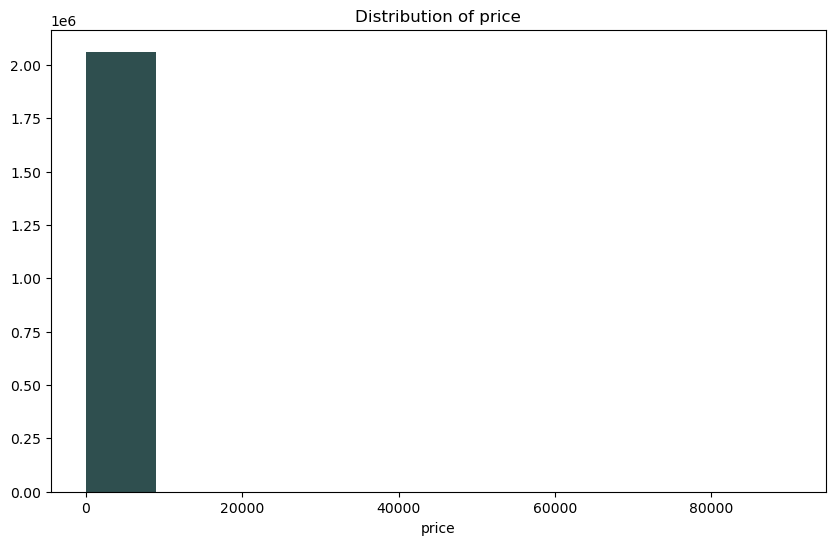

In [8]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.price, color="darkslategray")
axes.set_title("Distribution of price")
axes.set_xlabel("price")

plt.show()
plt.close()

### days_host

In [9]:
df.days_host.describe()

count    2.062316e+06
mean     1.332267e+01
std      1.099013e+02
min      1.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      2.023000e+03
Name: days_host, dtype: float64

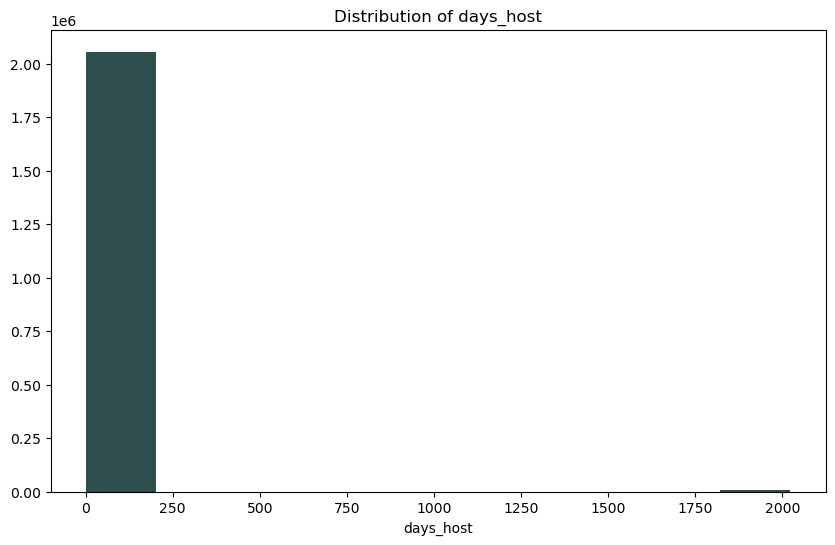

In [10]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.days_host, color="darkslategray")
axes.set_title("Distribution of days_host")
axes.set_xlabel("days_host")

plt.show()
plt.close()

### host_acceptance_rate

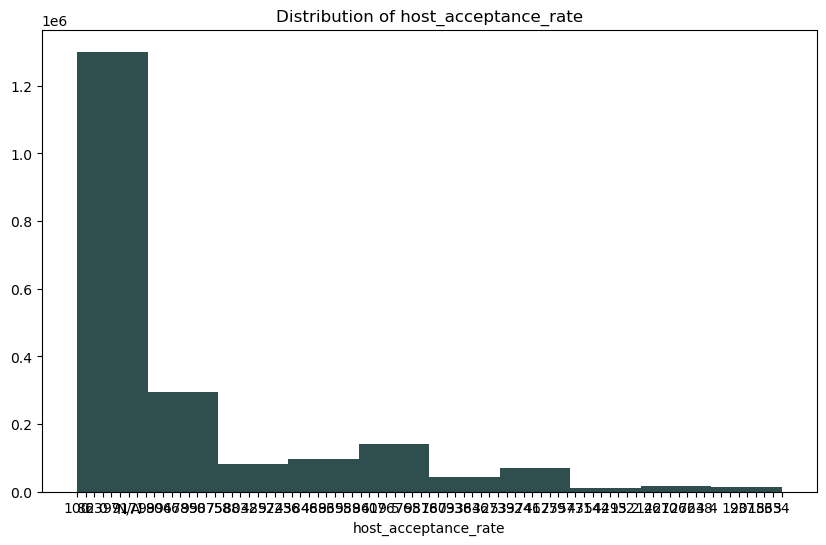

In [11]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.host_acceptance_rate, color="darkslategray")
axes.set_title("Distribution of host_acceptance_rate")
axes.set_xlabel("host_acceptance_rate")

plt.show()
plt.close()

### host_is_superhost

In [12]:
df.host_is_superhost.describe()

count     2062316
unique          3
top             f
freq      1398515
Name: host_is_superhost, dtype: object

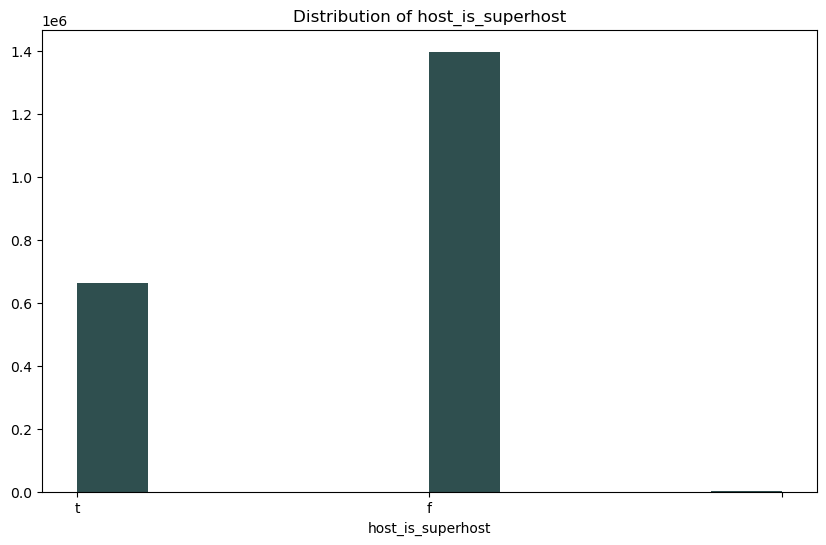

In [13]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.host_is_superhost, color="darkslategray")
axes.set_title("Distribution of host_is_superhost")
axes.set_xlabel("host_is_superhost")

plt.show()
plt.close()

### neighbourhood_cleansed

In [14]:
df.neighbourhood_cleansed.value_counts()

Capitol Hill, Lincoln Park                                                                           175859
Union Station, Stanton Park, Kingman Park                                                            172902
Dupont Circle, Connecticut Avenue/K Street                                                           151359
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           143731
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    124970
Shaw, Logan Circle                                                                                   115151
Georgetown, Burleith/Hillandale                                                                      101306
Brightwood Park, Crestwood, Petworth                                                                 100320
Ivy City, Arboretum, Trinidad, Carver Langston                                                        86861
Downtown, Chinatown, Penn Qu

### latitude

In [15]:
df.latitude.describe()

count    2.062316e+06
mean     3.891206e+01
std      2.879560e-02
min      3.880961e+01
25%      3.889622e+01
50%      3.890944e+01
75%      3.892476e+01
max      3.900735e+01
Name: latitude, dtype: float64

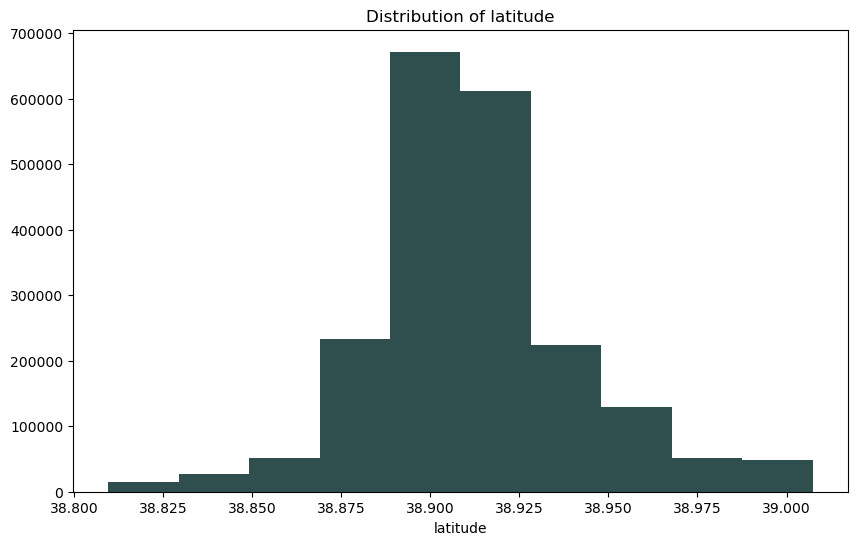

In [16]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.latitude, color="darkslategray")
axes.set_title("Distribution of latitude")
axes.set_xlabel("latitude")

plt.show()
plt.close()


### longitude


In [17]:
df.longitude.describe()

count    2.062316e+06
mean    -7.701804e+01
std      3.438951e-02
min     -7.713363e+01
25%     -7.703905e+01
50%     -7.701947e+01
75%     -7.699713e+01
max     -7.689149e+01
Name: longitude, dtype: float64

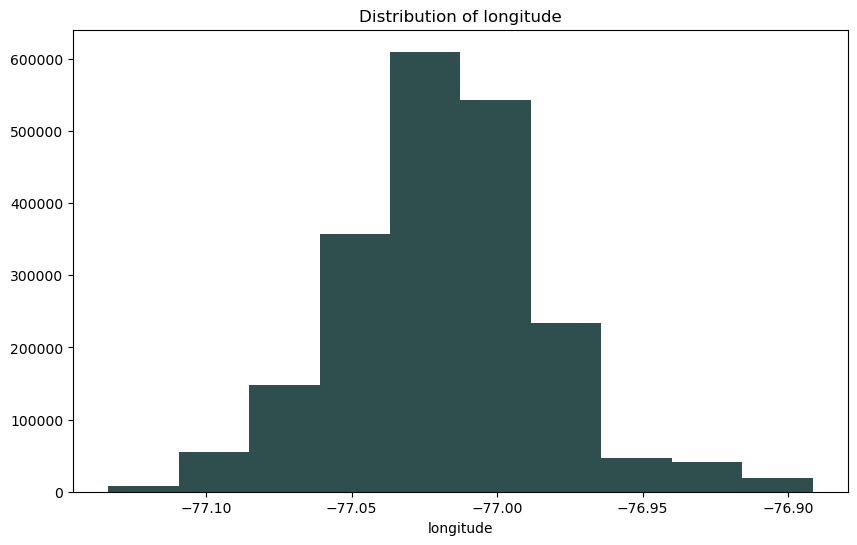

In [18]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.longitude, color="darkslategray")
axes.set_title("Distribution of longitude")
axes.set_xlabel("longitude")

plt.show()
plt.close()

### room_type

In [19]:
df.room_type.value_counts()

Entire home/apt    1596284
Private room        424577
Shared room          36342
Hotel room            5113
Name: room_type, dtype: int64

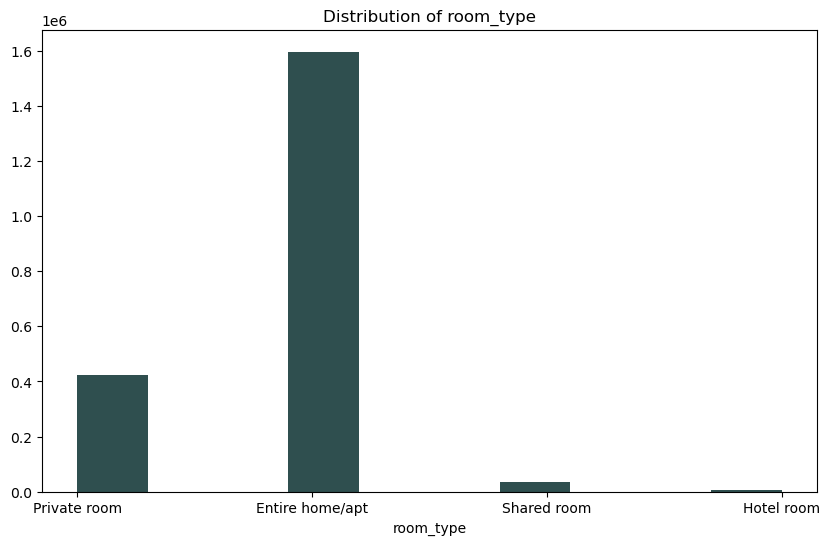

In [20]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.room_type, color="darkslategray")
axes.set_title("Distribution of room_type")
axes.set_xlabel("room_type")

plt.show()
plt.close()

### accommodates

In [21]:
df.accommodates.value_counts()

2     678184
4     468949
3     249484
6     180474
1     178859
5     132654
8      67253
7      29453
10     27824
12     19197
9       9224
16      8243
11      3786
14      3461
13      2989
15      1634
0        648
Name: accommodates, dtype: int64

In [22]:
df.accommodates.describe()

count    2.062316e+06
mean     3.649663e+00
std      2.324591e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      1.600000e+01
Name: accommodates, dtype: float64

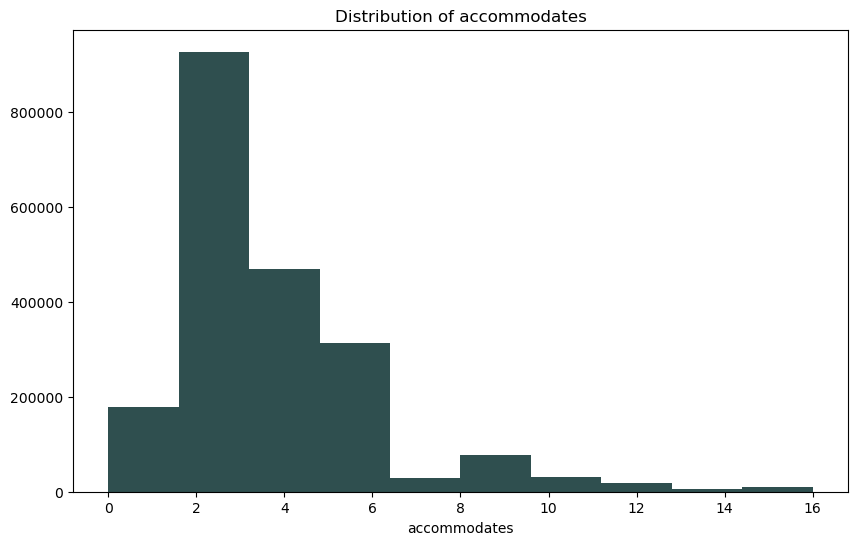

In [23]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.accommodates, color="darkslategray")
axes.set_title("Distribution of accommodates")
axes.set_xlabel("accommodates")

plt.show()
plt.close()

### bathrooms

In [24]:
df.bathrooms.describe()

count     2062316
unique          1
top              
freq      2062316
Name: bathrooms, dtype: object

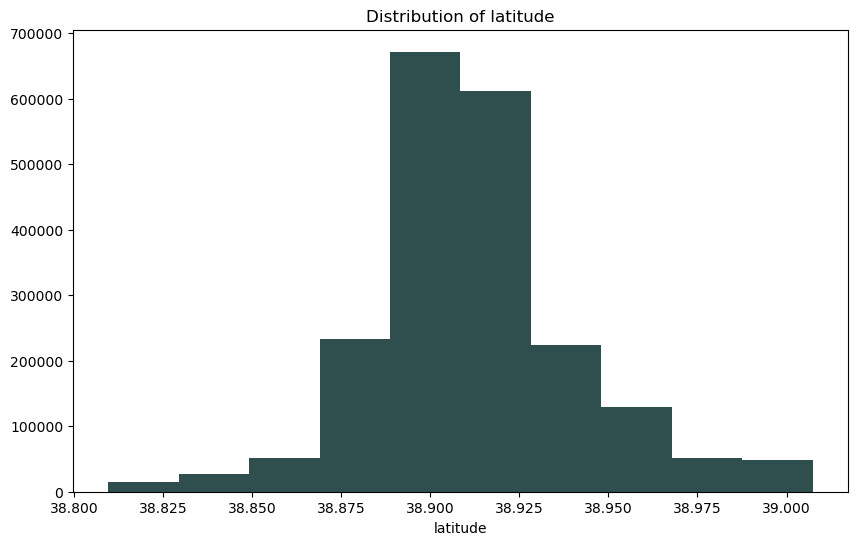

In [25]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.latitude, color="darkslategray")
axes.set_title("Distribution of latitude")
axes.set_xlabel("latitude")

plt.show()
plt.close()

### bedrooms

In [26]:
df.bedrooms.value_counts()

1     1194604
2      410509
       201335
3      155659
4       70291
5       18841
6        8229
7        1779
8         516
9         433
15        120
Name: bedrooms, dtype: int64

### number_of_reviews


In [27]:
df.number_of_reviews.describe()

count    2.062316e+06
mean     5.593617e+01
std      8.964109e+01
min      0.000000e+00
25%      2.000000e+00
50%      1.900000e+01
75%      7.000000e+01
max      8.980000e+02
Name: number_of_reviews, dtype: float64

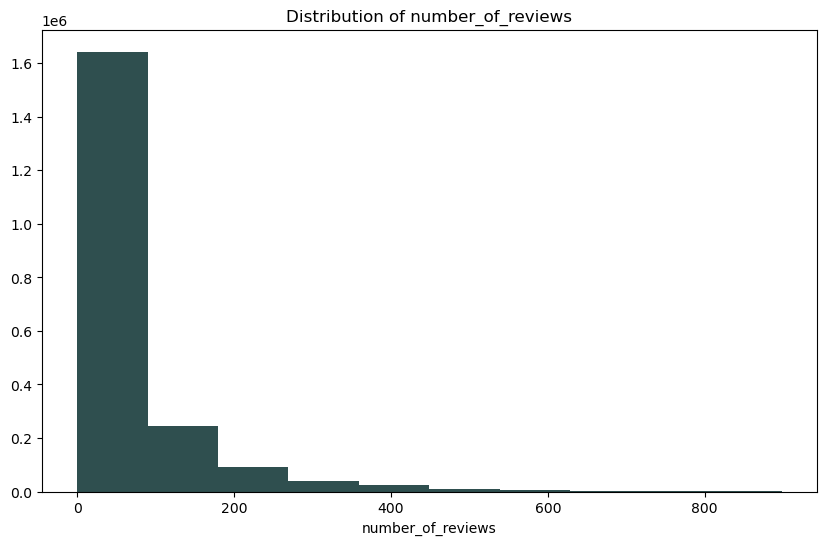

In [28]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.number_of_reviews, color="darkslategray")
axes.set_title("Distribution of number_of_reviews")
axes.set_xlabel("number_of_reviews")

plt.show()
plt.close()


### number_of_reviews_ltm


In [29]:
df.number_of_reviews_ltm.describe()

count    2.062316e+06
mean     1.483496e+01
std      2.375913e+01
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      2.300000e+01
max      5.610000e+02
Name: number_of_reviews_ltm, dtype: float64

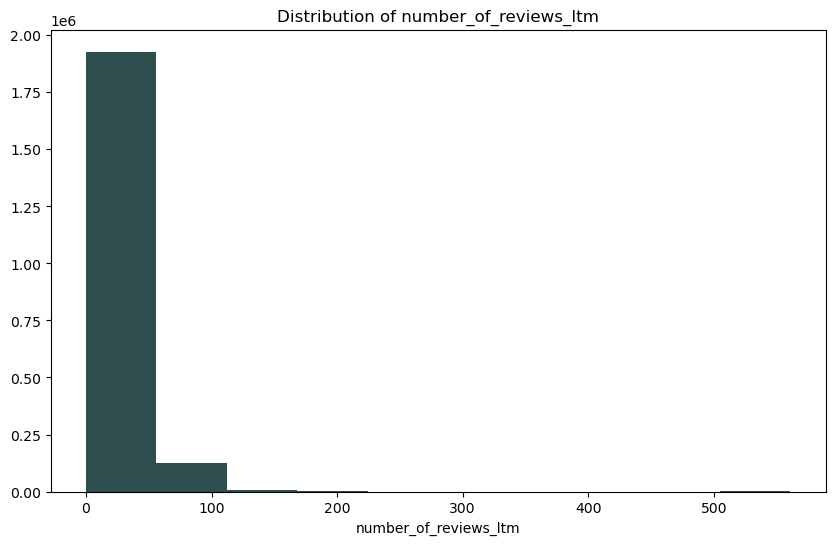

In [30]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.number_of_reviews_ltm, color="darkslategray")
axes.set_title("Distribution of number_of_reviews_ltm")
axes.set_xlabel("number_of_reviews_ltm")

plt.show()
plt.close()


### review_scores_rating


In [31]:
df.review_scores_rating.describe()

count     2062316
unique        141
top              
freq       352271
Name: review_scores_rating, dtype: object

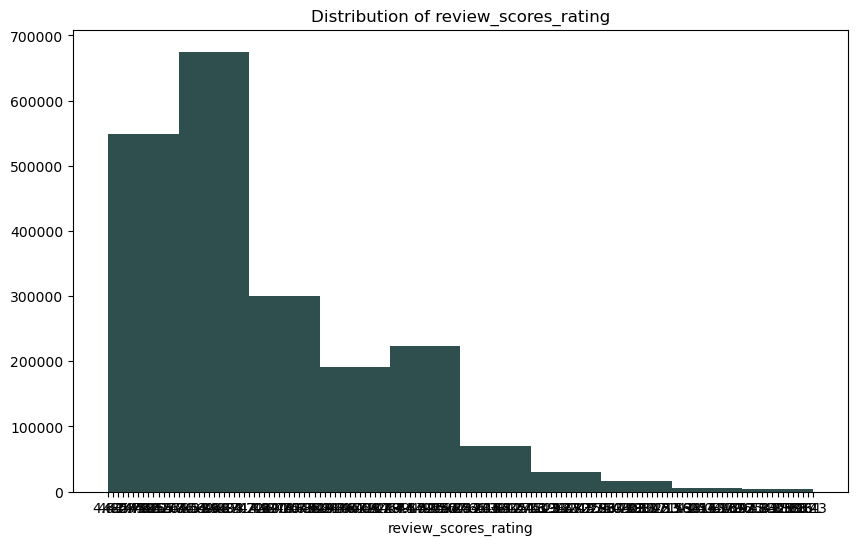

In [32]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.review_scores_rating, color="darkslategray")
axes.set_title("Distribution of review_scores_rating")
axes.set_xlabel("review_scores_rating")

plt.show()
plt.close()


### instant_bookable


In [33]:
df.instant_bookable.value_counts()

f    1509728
t     552588
Name: instant_bookable, dtype: int64

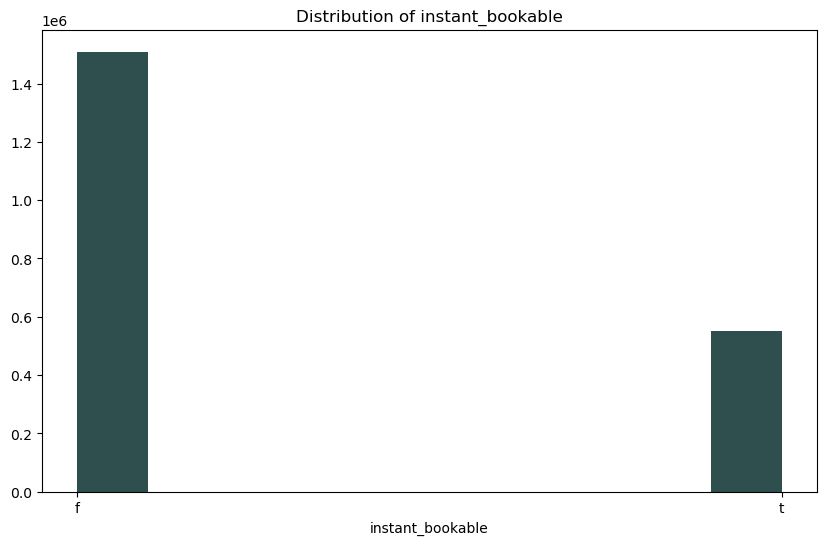

In [34]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.instant_bookable, color="darkslategray")
axes.set_title("Distribution of instant_bookable")
axes.set_xlabel("instant_bookable")

plt.show()
plt.close()


### calculated_host_listings_count


In [35]:
df.calculated_host_listings_count.describe()

count    2.062316e+06
mean     2.750379e+01
std      5.794751e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      1.100000e+01
max      2.350000e+02
Name: calculated_host_listings_count, dtype: float64

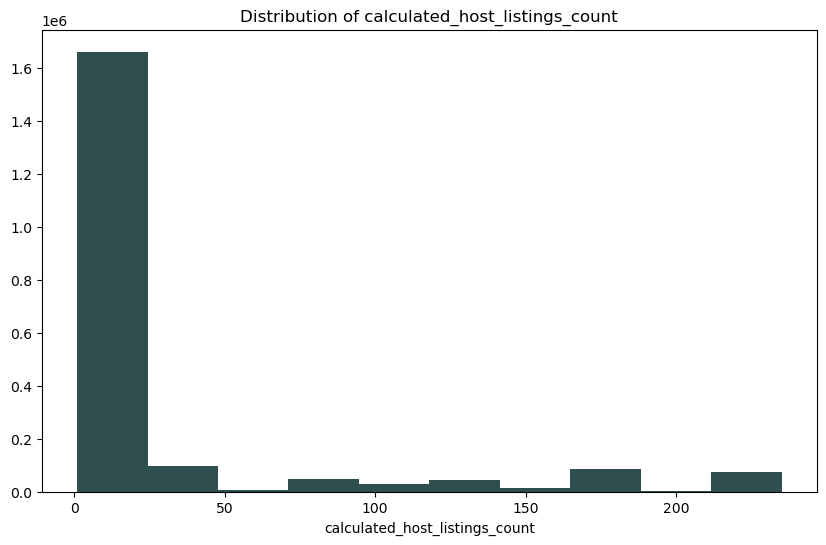

In [36]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.calculated_host_listings_count, color="darkslategray")
axes.set_title("Distribution of calculated_host_listings_count")
axes.set_xlabel("calculated_host_listings_count")

plt.show()
plt.close()

### tempday

In [37]:
df.tempday.describe()

count    2.062316e+06
mean     2.013620e+01
std      1.059257e+01
min     -1.100000e+01
25%      1.220000e+01
50%      2.060000e+01
75%      2.820000e+01
max      4.070000e+01
Name: tempday, dtype: float64

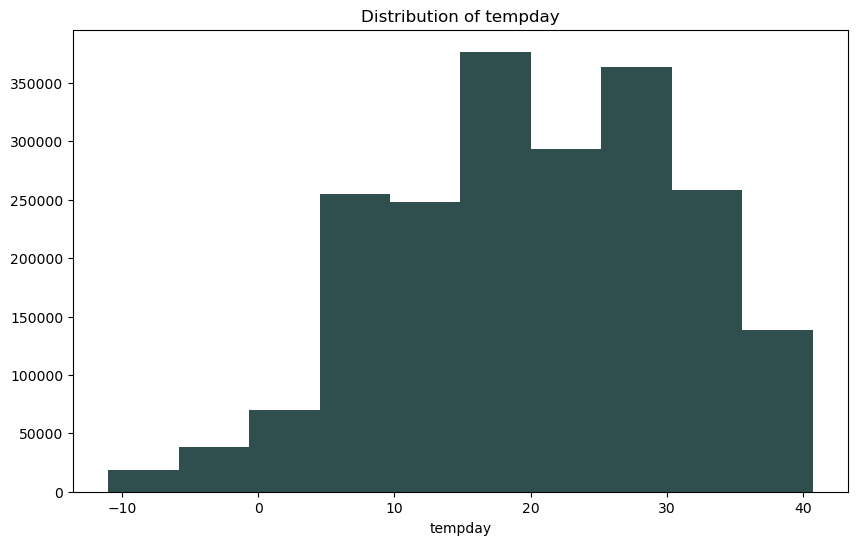

In [38]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.tempday, color="darkslategray")
axes.set_title("Distribution of tempday")
axes.set_xlabel("tempday")

plt.show()
plt.close()